# Analisis Juego a Juego de un jugador 

Lucho Oct | 2024

NBA de Stephen Curry en base a un dataset con resultados juego a juego. Se realizará un análisis exploratorio inicial y se trabajará con las estadísticas de los partidos, con el objetivo de limpiar los datos y realizar un modelo predictivo más adelante.

### Import Pack ages

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



### Import Dataset

In [2]:
csv_file_path = "nba_juego.csv"
df = pd.read_csv(csv_file_path)
df_raw = df.copy()
df.head()

,Año,Fecha,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,FT%,R,A,BLK,STL,PF,TO,PTS
0,2021,Dom. 16/5,MEM,['113-101'],['G'],40,16-36,44.4,9-22,40.9,5-6,83.3,7.0,9.0,1.0,1.0,2.0,7.0,46.0
1,2021,Mar. 11/5,PHX,['122-116'],['G'],37,7-22,31.8,1-11,9.1,6-6,100.0,3.0,6.0,0.0,1.0,2.0,3.0,21.0
2,2021,Lun. 10/5,UTAH,['119-116'],['G'],37,11-25,44.0,3-13,23.1,11-12,91.7,4.0,6.0,0.0,2.0,1.0,3.0,36.0
3,2021,Sáb. 8/5,OKC,['136-97'],['G'],29,14-26,53.8,11-21,52.4,10-10,100.0,5.0,2.0,0.0,1.0,2.0,1.0,49.0
4,2021,Jue. 6/5,OKC,['118-97'],['G'],31,11-21,52.4,6-13,46.2,6-7,85.7,4.0,7.0,0.0,1.0,2.0,3.0,34.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        210 non-null    int64  
 1   Fecha      210 non-null    object 
 2   OP         210 non-null    object 
 3   Resultado  210 non-null    object 
 4   Estado     210 non-null    object 
 5   MIN        210 non-null    object 
 6   FG         210 non-null    object 
 7   FG%        210 non-null    object 
 8   3PT        210 non-null    object 
 9   3P%        210 non-null    float64
 10  FT         210 non-null    object 
 11  FT%        210 non-null    float64
 12  R          210 non-null    float64
 13  A          210 non-null    float64
 14  BLK        186 non-null    float64
 15  STL        186 non-null    float64
 16  PF         184 non-null    float64
 17  TO         184 non-null    float64
 18  PTS        184 non-null    float64
dtypes: float64(9), int64(1), object(9)
memory usage: 3

In [4]:
df.isna().sum()

Año           0
Fecha         0
OP            0
Resultado     0
Estado        0
MIN           0
FG            0
FG%           0
3PT           0
3P%           0
FT            0
FT%           0
R             0
A             0
BLK          24
STL          24
PF           26
TO           26
PTS          26
dtype: int64

###### Funcion Auxiliar

In [5]:
# Función para asignar los puntos
def asignar_puntos(row):
    # Limpiar el resultado y separar los puntos
    resultado_limpio = row['Resultado'].strip("[]'TE ")  # Eliminar los corchetes y comillas
    row['Estado'] = row['Estado'].strip("[]'TE ")
    puntos = resultado_limpio.split('-')
    
    puntos1 = int(puntos[0])  # Puntos del equipo
    puntos2 = int(puntos[1])    # Puntos del rival
    if row['Estado'] == 'G':
        row['puntosEquipo'] = puntos1
        row['puntosRival'] = puntos2
    else:  # Perdido
        row['puntosEquipo'] = puntos2
        row['puntosRival'] = puntos1
    
    return row

# Función para asignar los puntos
def asignar_puntos_lanzamiento(row, lanzamiento):
    # Limpiar el resultado y separar los puntos
    puntos = row['FG'].split('-')
    
    puntos_anotados = int(puntos[0])  # Puntos del equipo
    puntos_intentados = int(puntos[1])    # Puntos del rival
    
    if lanzamiento == 'FG':
        row['FG_metidos'] = puntos_anotados
        row['FG_intentados'] = puntos_intentados
    elif lanzamiento == 'FT':
        row['FT_metidos'] = puntos_anotados
        row['FT_intentados'] = puntos_intentados
    else:
        row['3PT_metidos'] = puntos_anotados
        row['3PT_intentados'] = puntos_intentados
    
    return row

### Limpieza de Datos

In [6]:
# Supongamos que ya tienes tu DataFrame llamado df
# Crea una lista con los meses en inglés y las palabras a eliminar
months_in_english = ["january", "february", "march", "april", "may", 
                     "june", "july", "august", "september", 
                     "october", "november", "december", 
                     "Promedios", "Totales"]

# Filtrar el DataFrame para eliminar las filas que contienen esos valores en la columna 'fecha'
df_filtered = df[~df['Fecha'].str.contains('|'.join(months_in_english), na=False)]

In [7]:
# Eliminar columnas irrelevantes
df = df.drop(columns=['Fecha'])

# Verificar valores nulos
print(df.isnull().sum())

# Eliminar o imputar valores nulos si los hay
df = df.dropna()  

Año           0
OP            0
Resultado     0
Estado        0
MIN           0
FG            0
FG%           0
3PT           0
3P%           0
FT            0
FT%           0
R             0
A             0
BLK          24
STL          24
PF           26
TO           26
PTS          26
dtype: int64


In [8]:
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,FT%,R,A,BLK,STL,PF,TO,PTS
0,2021,MEM,['113-101'],['G'],40,16-36,44.4,9-22,40.9,5-6,83.3,7.0,9.0,1.0,1.0,2.0,7.0,46.0
1,2021,PHX,['122-116'],['G'],37,7-22,31.8,1-11,9.1,6-6,100.0,3.0,6.0,0.0,1.0,2.0,3.0,21.0
2,2021,UTAH,['119-116'],['G'],37,11-25,44.0,3-13,23.1,11-12,91.7,4.0,6.0,0.0,2.0,1.0,3.0,36.0
3,2021,OKC,['136-97'],['G'],29,14-26,53.8,11-21,52.4,10-10,100.0,5.0,2.0,0.0,1.0,2.0,1.0,49.0
4,2021,OKC,['118-97'],['G'],31,11-21,52.4,6-13,46.2,6-7,85.7,4.0,7.0,0.0,1.0,2.0,3.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2023,PHX,['134-105'],['P'],30,7-17,41.2,4-9,44.4,3-5,60.0,7.0,8.0,0.0,1.0,1.0,1.0,21.0
203,2023,SAC,['130-125'],['G'],31,11-22,50.0,7-12,58.3,4-4,100.0,5.0,2.0,0.0,1.0,3.0,2.0,33.0
204,2023,DEN,['128-123'],['P'],36,10-22,45.5,5-11,45.5,9-9,100.0,5.0,4.0,0.0,0.0,2.0,3.0,34.0
205,2023,LAL,['123-109'],['G'],33,10-22,45.5,4-13,30.8,9-9,100.0,6.0,7.0,1.0,4.0,1.0,4.0,33.0


#### Feature Engeniering

In [9]:
df['puntosEquipo'] = 0
df['puntosRival'] = 0
# Aplicar la función al DataFrame
df = df.apply(asignar_puntos, axis=1)
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FG')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= '3PT')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FT')

In [10]:
df.head()

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,...,TO,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,MEM,['113-101'],G,40,16-36,44.4,9-22,40.9,5-6,...,7.0,46.0,113,101,16,36,16,36,16,36
1,2021,PHX,['122-116'],G,37,7-22,31.8,1-11,9.1,6-6,...,3.0,21.0,122,116,7,22,7,22,7,22
2,2021,UTAH,['119-116'],G,37,11-25,44.0,3-13,23.1,11-12,...,3.0,36.0,119,116,11,25,11,25,11,25
3,2021,OKC,['136-97'],G,29,14-26,53.8,11-21,52.4,10-10,...,1.0,49.0,136,97,14,26,14,26,14,26
4,2021,OKC,['118-97'],G,31,11-21,52.4,6-13,46.2,6-7,...,3.0,34.0,118,97,11,21,11,21,11,21


In [11]:
df.isna().sum()

Año               0
OP                0
Resultado         0
Estado            0
MIN               0
FG                0
FG%               0
3PT               0
3P%               0
FT                0
FT%               0
R                 0
A                 0
BLK               0
STL               0
PF                0
TO                0
PTS               0
puntosEquipo      0
puntosRival       0
FG_metidos        0
FG_intentados     0
3PT_metidos       0
3PT_intentados    0
FT_metidos        0
FT_intentados     0
dtype: int64

In [12]:
df['OP'] = df['OP'].astype('category').cat.codes
df['Estado'] = df['Estado'].astype('category').cat.codes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 0 to 209
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             184 non-null    int64  
 1   OP              184 non-null    int8   
 2   Resultado       184 non-null    object 
 3   Estado          184 non-null    int8   
 4   MIN             184 non-null    object 
 5   FG              184 non-null    object 
 6   FG%             184 non-null    object 
 7   3PT             184 non-null    object 
 8   3P%             184 non-null    float64
 9   FT              184 non-null    object 
 10  FT%             184 non-null    float64
 11  R               184 non-null    float64
 12  A               184 non-null    float64
 13  BLK             184 non-null    float64
 14  STL             184 non-null    float64
 15  PF              184 non-null    float64
 16  TO              184 non-null    float64
 17  PTS             184 non-null    float64


In [14]:
df.columns

Index(['Año', 'OP', 'Resultado', 'Estado', 'MIN', 'FG', 'FG%', '3PT', '3P%',
       'FT', 'FT%', 'R', 'A', 'BLK', 'STL', 'PF', 'TO', 'PTS', 'puntosEquipo',
       'puntosRival', 'FG_metidos', 'FG_intentados', '3PT_metidos',
       '3PT_intentados', 'FT_metidos', 'FT_intentados'],
      dtype='object')

In [15]:
# Promedio de puntos en los últimos 5, 10 y 25 partidos
for n in [5, 10, 25]:
    df[f'Avg_Points_Last_{n}'] = df['PTS'].rolling(window=n).mean()
    df[f'Avg_FT_Met_Last_{n}'] = df['FT_metidos'].rolling(window=n).mean()
    df[f'Avg_3PT_Met_Last_{n}'] = df['3PT_metidos'].rolling(window=n).mean()
    df[f'Avg_FG_Met_Last_{n}'] = df['FG_metidos'].rolling(window=n).mean()
    df[f'Avg_FT_Int_Last_{n}'] = df['FT_intentados'].rolling(window=n).mean()
    df[f'Avg_3PT_Int_Last_{n}'] = df['3PT_intentados'].rolling(window=n).mean()
    df[f'Avg_FG_Int_Last_{n}'] = df['FG_intentados'].rolling(window=n).mean()
    df[f'Avg_punt_equipo_Last_{n}'] = df['puntosEquipo'].rolling(window=n).mean()
    df[f'Avg_punt_rival_Last_{n}'] = df['puntosRival'].rolling(window=n).mean()

#Eliminacion de columnas faltantes

df = df.drop(columns=['puntosEquipo', 'puntosRival','FG_intentados','FT_intentados','3PT_intentados',
                       'FG_metidos', 'FT_metidos', '3PT_metidos','FT','3PT','FG', 'Resultado', 'BLK', 
                       'MIN','TO', 'A', 'PF', 'R', 'STL', 'MIN', 'FG%',  '3P%', 'FT%' ])


#Llenar los nands

df = df.fillna(df.mean()).round(1)


In [16]:
df.head(10)

,Año,OP,Estado,PTS,Avg_Points_Last_5,Avg_FT_Met_Last_5,Avg_3PT_Met_Last_5,Avg_FG_Met_Last_5,Avg_FT_Int_Last_5,Avg_3PT_Int_Last_5,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,13,0,46.0,28.8,9.5,9.5,9.5,20.2,20.2,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
1,2021,22,0,21.0,28.8,9.5,9.5,9.5,20.2,20.2,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
2,2021,27,0,36.0,28.8,9.5,9.5,9.5,20.2,20.2,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
3,2021,19,0,49.0,28.8,9.5,9.5,9.5,20.2,20.2,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
4,2021,19,0,34.0,37.2,11.8,11.8,11.8,26.0,26.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
5,2021,17,1,37.0,35.4,11.2,11.2,11.2,25.0,25.0,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
6,2021,17,0,41.0,39.4,12.6,12.6,12.6,25.8,25.8,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
7,2021,9,0,30.0,38.2,12.2,12.2,12.2,25.4,25.4,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
8,2021,16,1,37.0,35.8,11.6,11.6,11.6,25.6,25.6,...,110.8,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6
9,2021,6,1,27.0,34.4,11.2,11.2,11.2,25.0,25.0,...,108.9,28.2,9.3,9.3,9.3,20.0,20.0,20.0,115.1,110.6


#### Creacion del Modelo

##### Seleccion de variables


Aqui es la seleccion de la variable predictora, y la division de los datos mismos del modelo.


In [17]:
# Variables predictoras (features)
# Seleccionar todas las columnas excepto 'PTS'
X = df.loc[:, df.columns != 'PTS']

# Variable objetivo (target)
y = df['PTS']

In [18]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

Evaluacion del Modelo

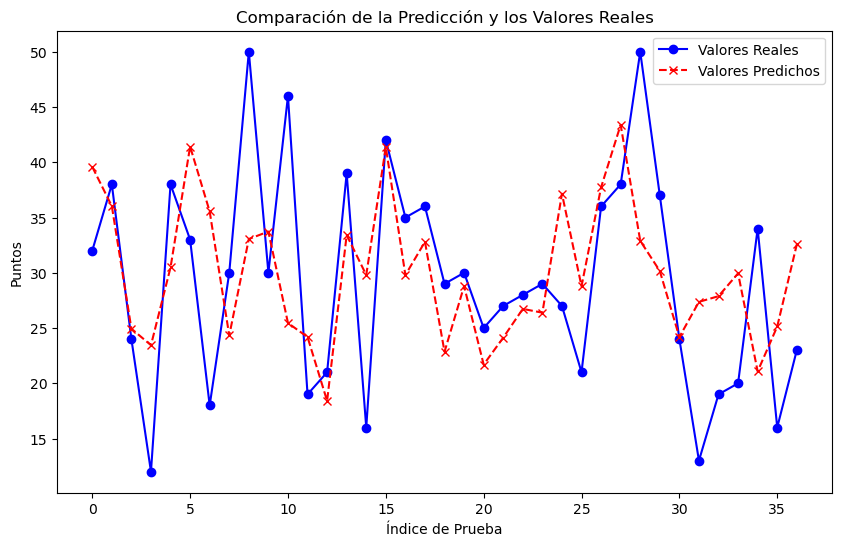

In [20]:
# Predicción
y_pred = model.predict(X_test)

# Gráfico de comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test.values, label='Valores Reales', color='b', marker='o')

# Graficar los valores predichos
plt.plot(y_pred, label='Valores Predichos', color='r', linestyle='--', marker='x')

# Añadir título y etiquetas
plt.title('Comparación de la Predicción y los Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Puntos')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [21]:
## Evaluacion

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 81.22044796203429
R2 Score: 0.1299761094503611


In [22]:
# Crear un DataFrame con los valores reales, predichos y la diferencia
resultados_df = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred,
    'Diferencia': y_test - y_pred
})

# Mostrar las primeras filas del DataFrame
print(resultados_df.head(20))

     Valor Real  Valor Predicho  Diferencia
19         32.0       39.587006   -7.587006
45         38.0       36.032747    1.967253
176        24.0       24.940964   -0.940964
124        12.0       23.446746  -11.446746
168        38.0       30.487658    7.512342
15         33.0       41.416908   -8.416908
25         18.0       35.547517  -17.547517
76         30.0       24.326678    5.673322
130        50.0       33.054993   16.945007
110        30.0       33.729167   -3.729167
109        46.0       25.457403   20.542597
183        19.0       24.185209   -5.185209
77         21.0       18.412040    2.587960
196        39.0       33.408731    5.591269
49         16.0       29.799590  -13.799590
16         42.0       41.366606    0.633394
55         35.0       29.792618    5.207382
38         36.0       32.805291    3.194709
93         29.0       22.853787    6.146213
60         30.0       28.791544    1.208456


In [23]:
# Obtener los coeficientes de las variables
coeficientes = model.coef_

# Mostrar las columnas con sus respectivos coeficientes
variables_influencia = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar las variables por la magnitud de su coeficiente
variables_influencia = variables_influencia.reindex(variables_influencia.Coeficiente.abs().sort_values(ascending=False).index)

# Mostrar las variables con mayor influencia
print(variables_influencia)

                   Variable  Coeficiente
22       Avg_FT_Met_Last_25     3.024180
24       Avg_FG_Met_Last_25     3.024180
23      Avg_3PT_Met_Last_25     3.024180
21       Avg_Points_Last_25    -2.717911
2                    Estado    -2.610722
4         Avg_FT_Met_Last_5     0.557060
6         Avg_FG_Met_Last_5     0.557060
5        Avg_3PT_Met_Last_5     0.557060
16       Avg_FT_Int_Last_10     0.476166
18       Avg_FG_Int_Last_10     0.476166
17      Avg_3PT_Int_Last_10     0.476166
3         Avg_Points_Last_5     0.461250
0                       Año    -0.444363
19  Avg_punt_equipo_Last_10    -0.358508
28  Avg_punt_equipo_Last_25     0.356833
13       Avg_FT_Met_Last_10    -0.328053
14      Avg_3PT_Met_Last_10    -0.328053
15       Avg_FG_Met_Last_10    -0.328053
25       Avg_FT_Int_Last_25     0.252260
26      Avg_3PT_Int_Last_25     0.252260
27       Avg_FG_Int_Last_25     0.252260
11    Avg_punt_rival_Last_5    -0.230993
29   Avg_punt_rival_Last_25     0.156135
20   Avg_punt_ri